<a href="https://colab.research.google.com/github/bala-codes/NEWS-CATEGORY-CLASSIFIER-USING-MACHINE-LEARNING-NLP/blob/master/codes/2.%20News%20Category%20Classifier%20Single%20Input%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/nb_classifier.pkl", "rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/svc_classifier.pkl", "rb") as fin:
  vectorizer, svc_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/pac_classifier.pkl", "rb") as fin:
  vectorizer, pac_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/calibrator_classifier.pkl", "rb") as fin:
  vectorizer, calibrator_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/logregcv_classifier.pkl", "rb") as fin:
  vectorizer, logregcv_classifier = pickle.load(fin)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/logreg_classifier.pkl", "rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/bb_classifier.pkl", "rb") as fin:
  vectorizer, bb_classifier = pickle.load(fin)

with open("/content/gdrive/My Drive/Machine Learning Projects/NEWS CATEGORY CLASSIFIER PROJECT/Pretrained Models/rf_classifier.pkl", "rb") as fin:
  vectorizer, rf_classifier = pickle.load(fin)

print("SUCCESS ALL MODELS LOADED")

In [ ]:
# Required Functions to predict the News

output = int()
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)
  class_labels = ['Politics','Technology','Entertainment','Business']
  value = class_labels[output[0]]

  j = [graph[0][0],graph[0][1],graph[0][2],graph[0][3]]
  y_pos = np.arange(len(class_labels))
  plt.barh(y_pos,j)
  plt.yticks(y_pos,class_labels)
  print()
  plt.title('PREDICTION FOR CATEGORIES')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN NEWS ARTICLE IS RELATED TO ' + start + str(value) + end)

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = svc_classifier.predict_proba(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = logregcv_classifier.predict_proba(x)
  pred7 = rf_classifier.predict_proba(x)
  pred8 = bb_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  return test_pred_prob,pred


# GIVE YOUR INPUT HERE

ENTER THE NEWS ARTCILE HERE : ENTER THE NEWS ARTCILE HERE : ENTER THE NEWS ARTCILE HERE : f you love to swing to music, then this could be your time to let your hair down at Dholi Taro Dandiya Night.  Wear your vibrant ethnic best and move gracefully in circles while keeping time with dandiya sticks to the tunes of Gujarati, Bollywood and DJ dandiya mix by DJ Akhil.   According to Deepika Kamnani, an organiser of the dance event, it all started when Priyadarsini Premakumary posted a message on Her Trivandrum, a Facebook page in which Deepika is a member.  “Priyadarshini, an NRI from the city, encouraged members of the group to organise a Dandiya night as a way to educate children about diverse festivals and celebrations in India,” says Deepika.  Inspired by the positive response to the post, Deepika decided to set the ball rolling and Utsav, a committee, was formed comprising Priya Harikumar, Sujaya George, Gayatri S Ajith, Sonali Kamnani, Athira Gopinathan, Shailja Sreekumar and Deepi

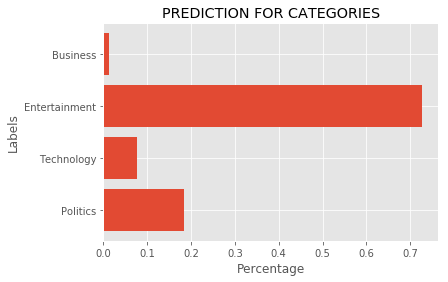


THE GIVEN NEWS ARTICLE IS RELATED TO Entertainment


In [ ]:
#String input
x = input("ENTER THE NEWS ARTCILE HERE : ") 
x=[x,]
prediction(x)
'''
   INPUT : you love to swing to music, then this could be your time to let your hair down at Dholi Taro Dandiya Night.
           Wear your vibrant ethnic best and move gracefully in circles while keeping time with dandiya sticks to the tunes of Gujarati, 
           Bollywood and DJ dandiya mix by DJ Akhil.   According to Deepika Kamnani, an organiser of the dance event, 
           it all started when Priyadarsini Premakumary posted a message on Her Trivandrum, a Facebook page in which Deepika is a member.  
           “Priyadarshini, an NRI from the city, encouraged members of the group to organise a Dandiya night as a way to educate children about 
           diverse festivals and celebrations in India,” says Deepika.  Inspired by the positive response to the post, Deepika decided 
           to set the ball rolling and Utsav, a committee, was formed comprising Priya Harikumar, Sujaya George, Gayatri S Ajith, Sonali Kamnani,
           Athira Gopinathan, Shailja Sreekumar and Deepika herself.  “There’s quite a lot of work to be done in such a short time, 
'''